<a href="https://colab.research.google.com/github/shankencedric/cs180proj/blob/main/MantisMinds%E2%84%A2%EF%B8%8F_Bucu_Legara_Project_THX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MantisMinds™️** Final Project
### COMBINING HUMAN AND MACHINE INTELLIGENCE FOR EDUCATIONAL PERFORMANCE PREDICTION
Final Project for CS 180 Artificial Intelligence under Ma'am Lyn Gabud, AY 2023-2024 Semester 2.

**BUCU, Clarisse Bianca C.** ---------- 2020-08925 (WFX)

**LEGARA, Sean Ken Cedric G.** ---- 2021-08117 (WFX)

# **Part 1: Introduction**

## Background & Motivation

Predicting student performance is crucial for tailoring educational interventions. Traditional methods often fall short, highlighting the need for innovative approaches. Machine learning (ML) offers a promising avenue, but integrating and interpreting predictions from both human educators and automated systems remains underexplored.

## Problem Statement

The research questions is as follows:

- How does the integration of human predictions in a Random Forest Regressor machine learning model for predicting student performance in exams affect the overall accuracy of the prediction model?

# **Part 2: Importing the Dataset**


## Data sources

The dataset used in the project is "[Performance vs. Predicted Performance](https://www.kaggle.com/datasets/daphnelenders/performance-vs-predicted-performance/)" from Kaggle user CALATHEA21. This dataset contains information about high school students, their human-predicted performance on an exam, and their actual performance.

The dataset is in English, and consists of 856 rows (students). The data for the human-predicted performance was collected by giving 107 participants 8 student profiles each whose final grades they then had to predict. Additionally, a good number of the predicting participants were subjected to some “Stereotype Activation”, suggesting that boys perform less well in school than girls.

Most of the rest of the information in the dataset (student profiles and their actual grade) were derived from another already existing dataset, “[Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)”.

In [10]:
# import ML packages
%pip install scikit-learn==1.5.0
import sklearn
import pandas as pd

# for cleaner table printing (optional)
pd.set_option('display.expand_frame_repr', False)

# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

# change to correct path
%cd "/content/drive/MyDrive/Year 3 Sem 2/CS 180/Project"

# import csv file of the "Performance vs. Predicted Performance" dataset
orig_dataset = pd.read_csv('Performance vs. Predicted Performance.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Year 3 Sem 2/CS 180/Project


## Data aspects

The features (columns) in the dataset include:

- **index** (int) - the index of each student. This can be used to match to students of the original dataset, “Student Alcohol Consumption”.

- **ParticipantID** (int) - the ID of the participant who made the performance predictions for the corresponding student.

- **name** (string) - fake names for each student, purely to make the prediction task more engaging for participants.

- **sex** (string) - the sex of each student, either female (F) or male (M).

- **studytime** (int) - denotes how long a student studied for their exam, numerically encoded to range from 1 to 3 (where 1 = less than 2 hours, 2 = 2-5 hours, 3 = more than 5 hours).

- **freetime** (int) - the student's amount of freetime, ranges from 1 (low) to 3 (high).

- **romantic** (binary) - denotes whether the student is in a romantic relationship or not.

- **Walc** (int) - the weekly alcohol consumption of student, ranges between 1 (none) to 4 (very high).

- **goout** (int) - amount of time the student goes out per week, ranges from 1 (never) to 4 (thrice or more per week).

- **Parents_edu** (int) - the highest education level of the student's parents. Ranges from 1 to 4, where 4 = highest level of education.

- **absences** (int) - the number of absences per student, ranges from 0 to 7, where 7 represents absences >=7 due to large number of absences being infrequent.

- **reason** (string) - the reason why the student chose to attend their current school. The levels are close to “home”, the school's “reputation”, the school's “course”/curriculum and “other”.

- **G3** (int) - the actual grade each student received for the final exam of the course, ranging from 0-20.

- **Pass** (binary) - a binary variable showing whether G3 is a passing grade (i.e. >=10) or not.

- **Predicted Grade** (binary) - the grade the student was predicted to receive by the participant.

- **Predicted Rank** (int) - how highly the student is ranked (between 1-8) according to their corresponding participant’s grade predictions.

- **Stereotype Activation** (string) - can be one of three forms:
 - “None” - No form of Stereotype Activation was presented.
 - “CaseBased” - Participants were shown three student profiles prior to the prediction task. One belonged to a female student, who was shown to have a high grade for the exam. The other two, belonged to male students, who were shown to have fairly low grades.
 - “Statistics” - Prior to the prediction task, some statistics were shown suggesting that boys perform less well in school than girls.

- **Predicted_Pass_PassFailStrategy** (binary) - one version of the biased binary decision label. This version was obtained by checking whether "Predicted Grade" was >=10 or not.

- **Predicted_Pass_RankingStrategy** (binary) - another version of the biased binary decision label. This version was obtained using "Predicted Rank".

In [11]:
# check the dataset
orig_dataset.head()

,index,ParticipantID,name,sex,studytime,freetime,romantic,Walc,goout,Parents_edu,absences,reason,G3,Pass,PredictedGrade,PredictedRank,StereotypeActivation,Predicted_Pass_PassFailStrategy,Predicted_Pass_RankingStrategy
0,132,1,Anna,F,1,2,no,1,2,4,0,course,15,True,17,4,NaN,True,True
1,724,1,Michael,M,1,1,no,4,4,4,1,reputation,11,True,10,7,NaN,True,False
2,637,1,David,M,1,2,no,4,2,2,0,other,11,True,13,6,NaN,True,True
3,884,1,Brian,M,1,1,no,4,4,3,7,home,9,False,10,8,NaN,True,False
4,194,1,Jenny,F,2,2,no,1,4,2,0,reputation,14,True,18,3,NaN,True,True


# **Part 3: Preprocessing**

## Dropping unecessary features

Some columns are not included in the scope of the project and thus have to be dropped. In particular, the following columns are irrelevant:

- **index** : This is merely for identification of students, hence not relevant.
- **ParticipantID** : This is merely for identification of participants, hence not relevant.
- **name** : This is merely to make the prediction task more engaging for participants, hence not relevant.
- **Pass** : We are concerned only with the G3 integer itself, since that is what we aim to predict in the project. Hence, **Pass** is not relevant.
- **PredictedRank** : We will not be predicting ranks, only individual grades. Hence, **PredictedRank** is not relevant.
- **Predicted_Pass_PassFailStrategy, Predicted_Pass_RankingStrategy** : Biased binary decision labels will not be tackled in our project, hence not relevant.

In [12]:
# Drop unnecessary columns
dataset = orig_dataset.drop(['index', 'ParticipantID', 'name', 'Pass', 'PredictedRank', 'Predicted_Pass_PassFailStrategy', 'Predicted_Pass_RankingStrategy'], axis=1)

# check the dataset
dataset.head()

,sex,studytime,freetime,romantic,Walc,goout,Parents_edu,absences,reason,G3,PredictedGrade,StereotypeActivation
0,F,1,2,no,1,2,4,0,course,15,17,NaN
1,M,1,1,no,4,4,4,1,reputation,11,10,NaN
2,M,1,2,no,4,2,2,0,other,11,13,NaN
3,M,1,1,no,4,4,3,7,home,9,10,NaN
4,F,2,2,no,1,4,2,0,reputation,14,18,NaN


## Renaming column labels
We will also be renaming the column labels to be more informative and format-consistent, for the sake of easy human interpretation.

In [13]:
# rename the columns
dataset.rename(columns = {
    'sex' : 'Sex',
    'studytime' : 'StudyTime',
    'freetime' : 'FreeTime',
    'romantic' : 'Romantic',
    'Walc' : 'WeeklyAlcoIntake',
    'goout' : 'GoOut',
    'Parents_edu' : 'ParentsEdu',
    'absences' : 'Absences',
    'reason' : 'Reason',
    'G3' : 'FinalGrade'
}, inplace=True)

# check the dataset
dataset.head()

,Sex,StudyTime,FreeTime,Romantic,WeeklyAlcoIntake,GoOut,ParentsEdu,Absences,Reason,FinalGrade,PredictedGrade,StereotypeActivation
0,F,1,2,no,1,2,4,0,course,15,17,NaN
1,M,1,1,no,4,4,4,1,reputation,11,10,NaN
2,M,1,2,no,4,2,2,0,other,11,13,NaN
3,M,1,1,no,4,4,3,7,home,9,10,NaN
4,F,2,2,no,1,4,2,0,reputation,14,18,NaN


## Formatting the data
Lastly, we will convert all string data into numbers to aid the machine learning process later on. Note that we will have to fill all null values with `0` first.

In [14]:
# Replace all nulls and NaNs with 0.
dataset.fillna(0, inplace=True)

In [15]:
# Convert all data to numbers.
dataset['Sex'].replace({'F' : 0, 'M' : 1}, inplace=True)
dataset['Romantic'].replace({'no' : 0, 'yes' : 1}, inplace=True)
dataset['Reason'].replace({'course' : 0, 'home' : 3, 'other' : 2, 'reputation' : 1}, inplace=True)
dataset['StereotypeActivation'].replace({'CaseBased' : 1, 'Statistics' : 2}, inplace=True)

# Print new possible values
print('Possible values of Sex:', dataset['Sex'].unique())
print('Possible values of Romantic:', dataset['Romantic'].unique())
print('Possible values of Reason:', dataset['Reason'].unique())
print('Possible values of StereotypeActivation:', dataset['StereotypeActivation'].unique())

# check final preprocessed dataset
dataset.head()

Possible values of Sex: [0 1]
Possible values of Romantic: [0 1]
Possible values of Reason: [0 1 2 3]
Possible values of StereotypeActivation: [0 1 2]


,Sex,StudyTime,FreeTime,Romantic,WeeklyAlcoIntake,GoOut,ParentsEdu,Absences,Reason,FinalGrade,PredictedGrade,StereotypeActivation
0,0,1,2,0,1,2,4,0,0,15,17,0
1,1,1,1,0,4,4,4,1,1,11,10,0
2,1,1,2,0,4,2,2,0,2,11,13,0
3,1,1,1,0,4,4,3,7,3,9,10,0
4,0,2,2,0,1,4,2,0,1,14,18,0


## Creating a second dataset for comparison

Since our research goal is to determine how the human predictions affect the accuracy of the machine learning model, we must create a copy of the dataset which does not include the human predictions, to be called `datasetNoHuman`, that the same machine learning model will also be trained on. Later on, the result of the two models will be compared to each other to determine if the integration of human predictions led to enhanced accuracy or not.

In [16]:
# Duplicating the dataset and dropping the human-predictions-related columns on one of them
datasetNoHuman = dataset.drop(['PredictedGrade', 'StereotypeActivation'], axis=1)

# Check the 2 datasets
print("Dataset with human predictions:\n", dataset.head())
print("Dataset with no human predictions\n", datasetNoHuman.head())

Dataset with human predictions:
    Sex  StudyTime  FreeTime  Romantic  WeeklyAlcoIntake  GoOut  ParentsEdu  Absences  Reason  FinalGrade  PredictedGrade  StereotypeActivation
0    0          1         2         0                 1      2           4         0       0          15              17                     0
1    1          1         1         0                 4      4           4         1       1          11              10                     0
2    1          1         2         0                 4      2           2         0       2          11              13                     0
3    1          1         1         0                 4      4           3         7       3           9              10                     0
4    0          2         2         0                 1      4           2         0       1          14              18                     0
Dataset with no human predictions
    Sex  StudyTime  FreeTime  Romantic  WeeklyAlcoIntake  GoOut  ParentsEdu

# **Part 4: Splitting the Dataset**

## Analyzing target distribution

We must first check if the data has an imbalanced distribution of the target feature. If most of the target values in the training data are within a narrow range, the model might be biased towards predicting within this range.

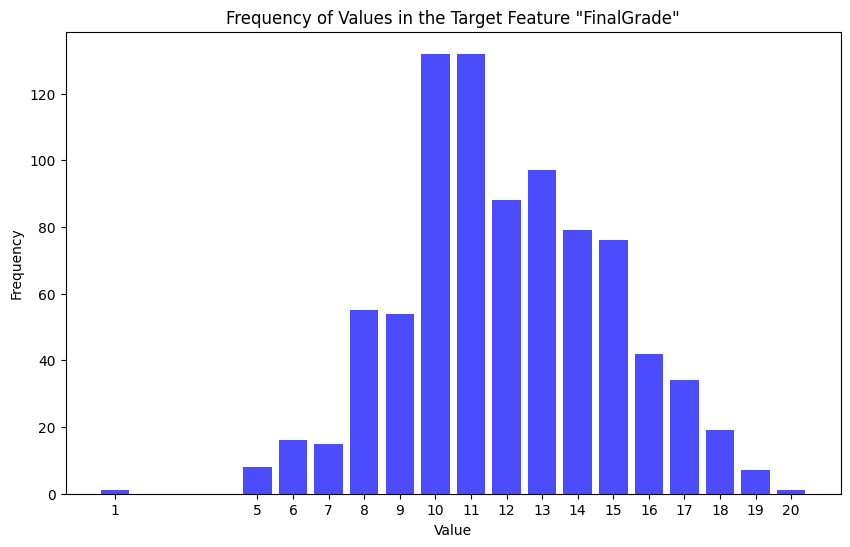

In [17]:
# import libary for plotting
import matplotlib.pyplot as plt

# Calculate the frequency of each unique value in the target feature
datasetY = dataset['FinalGrade']
value_counts = datasetY.value_counts().sort_index()

# plot the frequencies in a bar graph, for analyzing target distribution
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Values in the Target Feature "FinalGrade"')
plt.xticks(value_counts.index)  # Ensures all unique values are shown on the x-axis
plt.show()

It can be seen in the bar graph above that the dataset indeed has an imbalanced distribution of the target feature, with most entries ranging from the values 10-15. The cases where the scores are less than 10 or more than 15 are infrequent but nonetheless important, and our model should be able to address them. Hence, we chose to augment the training data with **oversampling**.

## Oversampling

Specifically, we used **random oversampling**, which increases the minority class samples through replication of existing examples. We were unable to use Synthetic Minority Over-sampling Technique (SMOTE) since some classes have very few samples, and SMOTE won't be able to generate synthetic samples from them.

By amplifying the underrepresented classes prior to model training, the model will be able to more holistically represent all categories in the target feature.

In [18]:
# Import libraries for oversampling
from sklearn.utils import resample
from collections import Counter
import numpy as np

# oversampling function
def random_oversampling(dataset, value, min_range, max_range, majority_class):
    if value < min_range or value > max_range:
        upsampled_class = resample(dataset[dataset['FinalGrade'] == value],
                                   replace=True,  # Sample with replacement
                                   n_samples=len(majority_class),  # Match number of majority class
                                   random_state=42)  # Seed for reproducibility
    else:
        upsampled_class = dataset[dataset['FinalGrade'] == value]
    return upsampled_class

# Check the distribution of the target variable
print(f"Original target distribution: {Counter(dataset['FinalGrade'])}")

# Identify the majority class
majority_class = dataset[dataset['FinalGrade'] == 10]

# Initialize upsampled dataset with majority class
upsampled_dataset = majority_class.copy()

# Define the range for the minority classes
min_range = 10
max_range = 15

# Iterate over each unique value in the target feature 'FinalGrade'
for value in dataset['FinalGrade'].unique():
    if value != 10:  # Skip the majority class itself
        upsampled_class = random_oversampling(dataset, value, min_range, max_range, majority_class)
        upsampled_dataset = pd.concat([upsampled_dataset, upsampled_class])

# Check the new distribution of the target variable
print(f"Upsampled target distribution: {Counter(upsampled_dataset['FinalGrade'])}")

Original target distribution: Counter({11: 132, 10: 132, 13: 97, 12: 88, 14: 79, 15: 76, 8: 55, 9: 54, 16: 42, 17: 34, 18: 19, 6: 16, 7: 15, 5: 8, 19: 7, 20: 1, 1: 1})
Upsampled target distribution: Counter({10: 132, 11: 132, 9: 132, 16: 132, 8: 132, 18: 132, 5: 132, 7: 132, 17: 132, 6: 132, 19: 132, 20: 132, 1: 132, 13: 97, 12: 88, 14: 79, 15: 76})


### The plot below is simply so we can visualize and compare the difference before (previous bar graph) and after (below bar graph) oversampling.

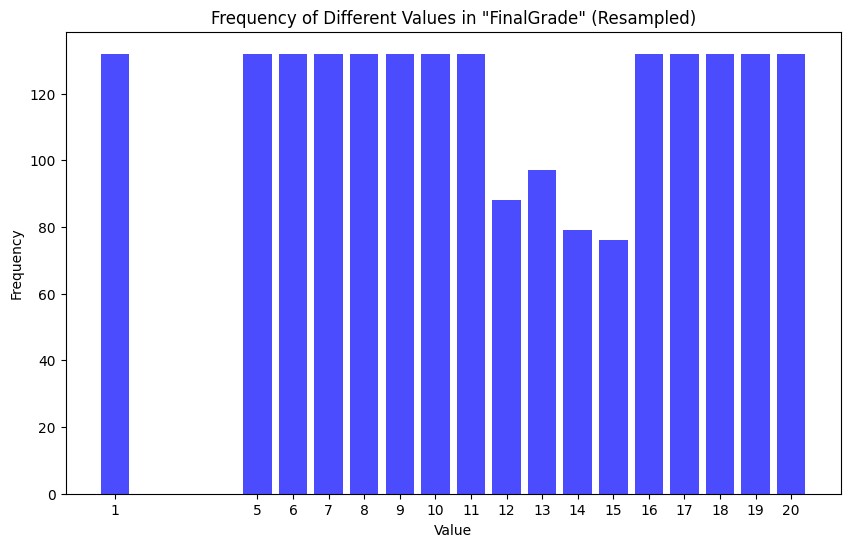

In [19]:
# Plot the bar graph of the resampled target distribution
value_counts = upsampled_dataset['FinalGrade'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Different Values in "FinalGrade" (Resampled)')
plt.xticks(value_counts.index)  # Ensures all unique values are shown on the x-axis
plt.show()

## Separating the target feature
Now, we need to separate the target feature (`FinalGrade`) as the *Y* vector from the rest of the features which comprise the *X* matrix. Note that this is done on both datasets with and without human predictions.

In [20]:
# separating the target feature 'FinalGrade' in the w/ human dataset
datasetX = upsampled_dataset.drop('FinalGrade', axis=1)
datasetY = upsampled_dataset['FinalGrade']

# check separation results
print(datasetX.head())
print(datasetY.head())

# updating datasetNoHuman with upsampled entries
datasetNoHuman = upsampled_dataset.drop(['PredictedGrade', 'StereotypeActivation'], axis=1)

# separating the target feature 'FinalGrade' in the no human dataset
datasetNoHumanX = datasetNoHuman.drop('FinalGrade', axis=1)
datasetNoHumanY = datasetNoHuman['FinalGrade']

# check separation results
print(datasetNoHumanX.head())
print(datasetNoHumanY.head())

    Sex  StudyTime  FreeTime  Romantic  WeeklyAlcoIntake  GoOut  ParentsEdu  Absences  Reason  PredictedGrade  StereotypeActivation
16    0          1         2         1                 4      4           2         1       0               4                     1
26    1          1         2         1                 3      3           2         2       2               8                     0
28    1          3         3         0                 4      4           3         0       0              16                     0
40    1          2         3         1                 3      4           1         0       0              13                     0
53    0          2         3         0                 1      4           1         3       3              15                     2
16    10
26    10
28    10
40    10
53    10
Name: FinalGrade, dtype: int64
    Sex  StudyTime  FreeTime  Romantic  WeeklyAlcoIntake  GoOut  ParentsEdu  Absences  Reason
16    0          1         2         1

## 60-20-20 Split
Now, we need to split the dataset into the training, validation, and testing sets with a 60-20-20 split **respectively**. We can do this easily with the `train_test_split` function imported from `sklearn`, but take note that we will be using a constant value (named `randState`) in the `random_state` parameter such that the output is consistent throughout reruns. Note also that we will call this function twice: first to get an 80-20 split (20% for the testing set, 80% for the rest), then to use the rest to get the 60-20 split (60% for the training set, 20% for the validation set).

In [21]:
from sklearn.model_selection import train_test_split
randState = 420

# First split to get testing set (20%) and the rest (80%) [note that the rest is actually the training and validation sets combined]
xRest, xTest, yRest, yTest = train_test_split(datasetX, datasetY, train_size=(80/100), test_size=(20/100), random_state=randState)
xRestNH, xTestNH, yRestNH, yTestNH = train_test_split(datasetNoHumanX, datasetNoHumanY, train_size=(80/100), test_size=(20/100), random_state=randState)

# Second split to get training (60%) and validation sets (20%)
xTrain, xValid, yTrain, yValid = train_test_split(xRest, yRest, train_size=(60/80), test_size=(20/80), random_state=randState)
xTrainNH, xValidNH, yTrainNH, yValidNH = train_test_split(xRestNH, yRestNH, train_size=(60/80), test_size=(20/80), random_state=randState)

# Check shapes
print(f"[Dataset] Training set: {xTrain.shape}")
print(f"[Dataset] Validation set: {xValid.shape}")
print(f"[Dataset] Testing set: {xTest.shape}\n")

print(f"[Dataset with no human predictions] Training set: {xTrainNH.shape}")
print(f"[Dataset with no human predictions] Validation set: {xValidNH.shape}")
print(f"[Dataset with no human predictions] Testing set: {xTestNH.shape}")

[Dataset] Training set: (1233, 11)
[Dataset] Validation set: (411, 11)
[Dataset] Testing set: (412, 11)

[Dataset with no human predictions] Training set: (1233, 9)
[Dataset with no human predictions] Validation set: (411, 9)
[Dataset with no human predictions] Testing set: (412, 9)


# **Part 4: Training & Validation**

## The Machine Learning Model
As mentioned in the introduction, the machine learning model we will be using is **Random Forest Regressor**. This was the model chosen due to how it excels in predicting continuous values, which in our case would be a student's numerical grade. It is also known to perform well when dealing with data that exhibits non-linear trends. Since we are still not aware how the individual features in the dataset affect the target value, and hence unsure if the trends were linear, this model was a good fit for determining the potentially complex relationships between the inputs.

In [22]:
# importing the model & other needed libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

## Grid Search for Hyperparameter Tuning

We chose to create a grid search function to iteratively look for the best combination of hyperparameters among our given candidates in a Parameter Grid. Running the training/tuning code below results in the accuracy metrics (Mean Squared Error (MSE)) for both models being printed out.

We ran the training/tuning code below multiple times, with each iteration adjusting the Parameter Grid values to improve/lessen the MSE, as well as balance out the bias between the training and validation accuracies.

In [23]:
# Getting good hyperparameters. This cell will take a few minutes to finish running.
# Note that this cell need not be run if they are already found.

# Parameter grid: to define all parameter value combinations to test
paramGrid = ParameterGrid({
    'n_estimators': [200, 350, 400, 600],
    'max_depth': [None, 10, 50],
    'min_samples_split': [2, 3, 4, 5, 7],
    'min_samples_leaf': [1, 4, 5, 10, 12]
})

# Create grid search function for getting the
def gridSearch(xTrain, yTrain, xValid, yValid):
  bestScore = float('inf')
  bestParams = None
  for params in paramGrid:
    # Train model with the each hyperparameters
    rf = RandomForestRegressor(**params, n_jobs=-1, random_state=randState)
    rf.fit(xTrain, yTrain)

    # Evaluate on the validation set
    yValidPred = rf.predict(xValid)
    predScore = mean_squared_error(yValid, yValidPred)

    # Record if it is the best so far
    if predScore < bestScore:
      bestScore = predScore
      bestParams = params

  return bestParams

## Grid search to find the optimal hyperparameters
## Note: This has been commented out to avoid rerunning the tuning code and consume time, since the hyperparameters are already found
#bestParams = gridSearch(xTrain, yTrain, xValid, yValid)
#bestParamsNH = gridSearch(xTrainNH, yTrainNH, xValidNH, yValidNH)
#print(f"[Dataset] Found the best hyperparams as:\n{bestParams}")
#print(f"[Dataset with no human predictions] Found the best hyperparams as:\n{bestParamsNH}\n")

### Once the hyperparameters are found, we can finally train the models with it.

In [24]:
# Good hyperparameters found (via the previous cell)
bestParams = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}
bestParamsNH = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}

# Train the data with the optimal hyperparameters
tunedModel = RandomForestRegressor(**bestParams, random_state=randState)
tunedModel.fit(xTrain, yTrain)
tunedModelNH = RandomForestRegressor(**bestParamsNH, random_state=randState)
tunedModelNH.fit(xTrainNH, yTrainNH)

RandomForestRegressor(n_estimators=350, random_state=420)

### Next, let us evaluate the accuracy metric (MSE) of the trained models on each set.

In [25]:
# Evaluate data on the training set
trainPred = list(map(lambda x: round(x), tunedModel.predict(xTrain)))
trainPredNH = list(map(lambda x: round(x), tunedModelNH.predict(xTrainNH)))
print(f"[Dataset] Score (TRAINING): {mean_squared_error(yTrain, trainPred)}")
print(f"[Dataset with no human predictions] Score (TRAINING): {mean_squared_error(yTrainNH, trainPredNH)}\n")

# Evaluate data on the validation set
validPred = list(map(lambda x: round(x), tunedModel.predict(xValid)))
validPredNH = list(map(lambda x: round(x), tunedModelNH.predict(xValidNH)))
print(f"[Dataset] Score (VALIDATION): {mean_squared_error(yValid, validPred)}")
print(f"[Dataset with no human predictions] Score (VALIDATION): {mean_squared_error(yValidNH, validPredNH)}\n")

# Evaluate data on the testing set
testPred = list(map(lambda x: round(x), tunedModel.predict(xTest)))
testPredNH = list(map(lambda x: round(x), tunedModelNH.predict(xTestNH)))
print(f"[Dataset] Score (TESTING): {mean_squared_error(yTest, testPred)}")
print(f"[Dataset with no human predictions] Score (TESTING): {mean_squared_error(yTest, testPredNH)}\n")

[Dataset] Score (TRAINING): 0.4209245742092457
[Dataset with no human predictions] Score (TRAINING): 0.8734793187347932

[Dataset] Score (VALIDATION): 2.8418491484184916
[Dataset with no human predictions] Score (VALIDATION): 2.9416058394160585

[Dataset] Score (TESTING): 2.104368932038835
[Dataset with no human predictions] Score (TESTING): 2.203883495145631



### Lastly, let us upload the trained models to the [project Google Drive folder](https://drive.google.com/drive/folders/1P7SCGXvsZqd-Xr26e902q60VZw8io6Ql?usp=drive_link). This cell need not be run multiple times.

In [26]:
import joblib

modelPath = './tunedModel.pkl'
modelPathNH = './tunedModelNH.pkl'
joblib.dump(tunedModel, modelPath)
joblib.dump(tunedModelNH, modelPathNH)

['./tunedModelNH.pkl']

# **Part 5: Results & Conclusions**

**Training MSE Difference:** The difference is approximately 0.469, indicating that the dataset with human predictions has a slightly higher MSE.

**Validation MSE Difference:** The difference is approximately 0.025, indicating a very small increase in MSE for the dataset with human predictions.

**Testing MSE Difference:** The difference is approximately 0.082, showing a slight increase in MSE for the dataset with human predictions.

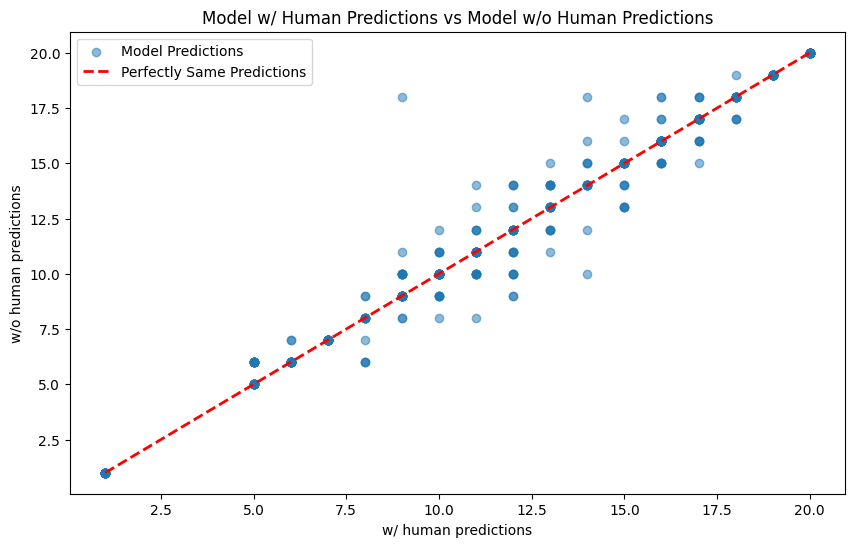

In [27]:
# Plot the results of the two models together, for comparison
plt.figure(figsize=(10, 6))
plt.scatter(testPred, testPredNH, alpha=0.5)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--', lw=2)  # Line showing perfect predictions
plt.xlabel('w/ human predictions')
plt.ylabel('w/o human predictions')
plt.title('Model w/ Human Predictions vs Model w/o Human Predictions')
plt.legend(['Model Predictions', 'Perfectly Same Predictions'])
plt.show()

The differences in MSE values between the two datasets are relatively small, particularly for the validation and testing sets. While the training set shows a larger difference, it is still less than 0.5. These differences may not be statistically significant, but to make a formal conclusion, a statistical test like a paired t-test or another appropriate test considering the distribution and sample sizes would be necessary. However, based purely on these computed differences, the performance of the model does not seem to be drastically different between the two datasets.

Hence, <u>the integration of human predictions in a Random Forest Regressor machine learning model for predicting student performance in exams does not significantly affect the overall accuracy of the prediction model</u>.

However, it must be noted that the participants who gave their predictions in the dataset were not labeled to be knowledgeable in the field of education (i.e. teachers). Hence, the possibility of human feedback augmenting an educational performance prediction system must not be completely disregarded, especially in situations where the users are educators themselves. Further research utilizing a different dataset involving actors in the field of education is recommended to explore real-world usage and implications.

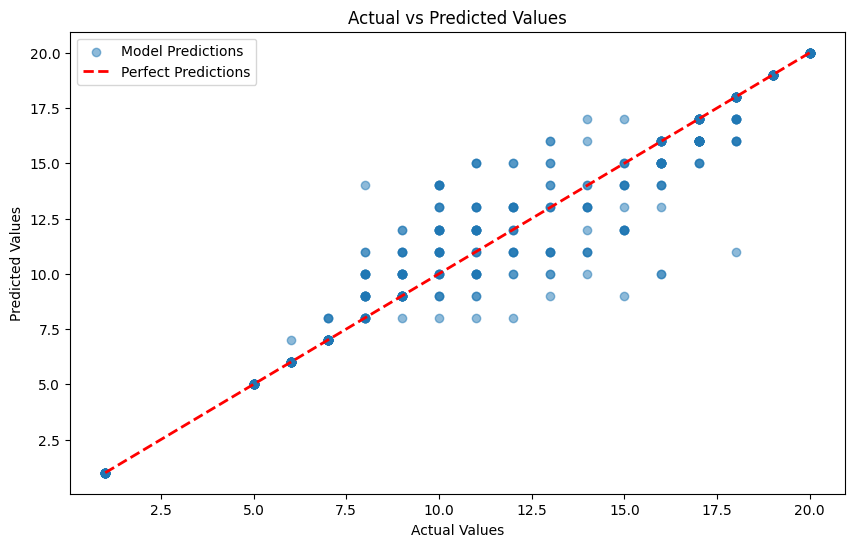

In [28]:
# Plot the results of the model trained w/ human predictions, for checking its individual accuracy
plt.figure(figsize=(10, 6))
plt.scatter(yTest, testPred, alpha=0.5)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--', lw=2)  # Line showing perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend(['Model Predictions', 'Perfect Predictions'])
plt.show()

Furthermore, sdfnaksjdfbjksdfbkjsbksabdkfb

## Further Exploration of Results

The code below extracts the feature importances, and then plots them using a bar chart. This visualization helps in quickly identifying which features are most influential in determining the output variable (final grade predicted by the Random Forest Regressor Model).

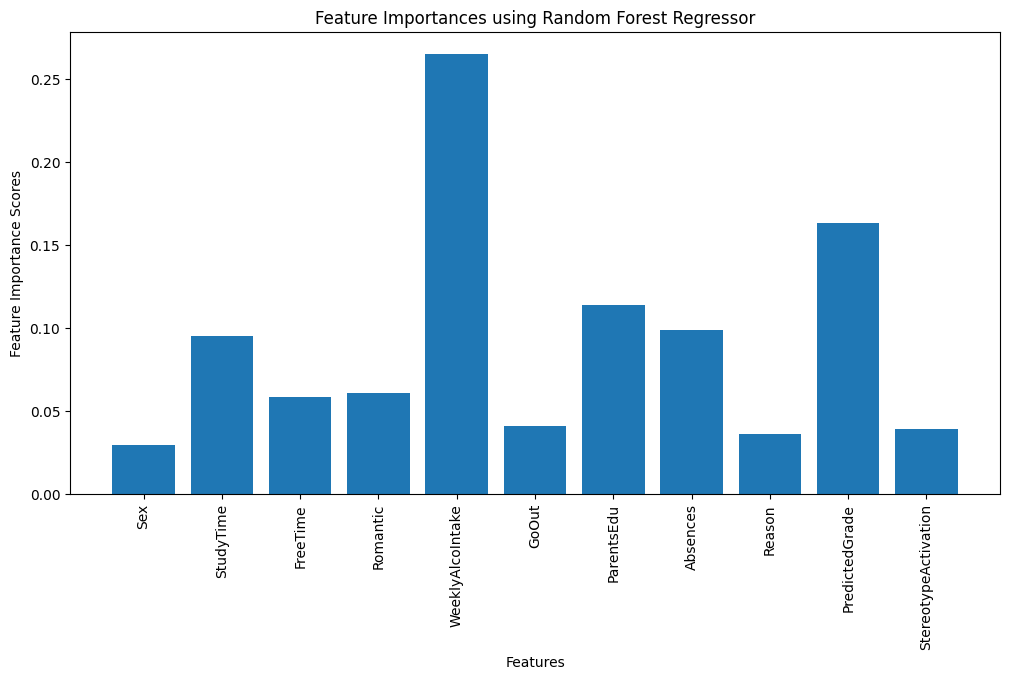

In [29]:
# Get feature importances
importances = tunedModel.feature_importances_

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(xTrain.shape[1]), importances)
plt.xticks(range(xTrain.shape[1]), xTrain.columns, rotation=90)
plt.ylabel('Feature Importance Scores')
plt.xlabel('Features')
plt.title('Feature Importances using Random Forest Regressor')
plt.show()

# **Demo Code**
### The contents of this cell is also a file found in the [project repository](https://github.com/shankencedric/cs180proj).

In [32]:
# Google colab-specific pre-requisite code
%cd "/content/"

/content


In [33]:
import pandas as pd
import joblib

def getInput():
  while True:
    try: sex = input("Sex (M/F): ")
    except: continue

    if sex in ('F', 'f', '0'): sex = 0
    elif sex in ('M', 'm', '1'): sex = 1
    if sex in (0, 1): break

  while True:
    try: studyTime = float(input("How long did you study for the exam (in hours): "))
    except: continue

    if studyTime < 2: studyTime = 1
    elif studyTime >= 2 and studyTime <= 5: studyTime = 2
    elif studyTime > 5: studyTime = 3
    if studyTime in (1, 2, 3): break

  while True:
    try: freeTime = float(input("How often/much is your free time (scale from 1 to 3): "))
    except: continue

    freeTime = int(freeTime)
    if freeTime < 1: freeTime = 1
    elif freeTime > 3: freeTime = 3
    if freeTime in (1, 2, 3): break

  while True:
    try: romantic = input("Are you in any form of romantic relationship (yes/no): ")
    except: continue

    _romantic = romantic.lower()
    if _romantic in ('no', 'n', '0'): romantic = 0
    elif _romantic in ('yes', 'y', '1'): romantic = 1
    if romantic in (0, 1): break

  while True:
    try: weeklyAlcoIntake = float(input("How much alcohol do you consume weekly (scale from 1 to 4): "))
    except: continue

    weeklyAlcoIntake = int(weeklyAlcoIntake)
    if weeklyAlcoIntake < 1: weeklyAlcoIntake = 1
    elif weeklyAlcoIntake > 4: weeklyAlcoIntake = 4
    if weeklyAlcoIntake in (1, 2, 3, 4): break

  while True:
    try: goOut = float(input("How often/much do you go out (scale from 1 to 4): "))
    except: continue

    goOut = int(goOut)
    if goOut < 1: goOut = 1
    elif goOut > 4: goOut = 4
    if goOut in (1, 2, 3, 4): break

  while True:
    try: parentsEdu = float(input("Highest education level of your parents (scale from 1 to 4): "))
    except: continue

    parentsEdu = int(parentsEdu)
    if parentsEdu < 1: parentsEdu = 1
    elif parentsEdu > 4: parentsEdu = 4
    if parentsEdu in (1, 2, 3, 4): break

  while True:
    try: absences = float(input("Your absences in this course: "))
    except: continue

    absences = int(absences)
    if absences < 1: absences = 1
    elif absences > 7: absences = 7
    if absences in (1, 2, 3, 4, 5, 6, 7): break

  while True:
    try: reason = input("Your main reason for choosing to attend this school ('course' if course-related, 'reputation' if school reputation-related, 'home' if residency-related, or 'other'): ")
    except: continue

    _reason = reason.lower()
    if _reason in ('course', '0'): reason = 0
    if _reason in ('reputation', '1'): reason = 1
    if _reason in ('other', '2'): reason = 2
    if _reason in ('home', '3'): reason = 3
    if reason in (0, 1, 2, 3): break

  while True:
    try:
      finalGrade = input("(Optional) The grade you got for this exam (0-20, or press enter to skip): ")
      if finalGrade == '': finalGrade = -1
      else: finalGrade = float(finalGrade)
    except: continue

    if finalGrade == -1: break
    elif finalGrade < 0: finalGrade = 0
    elif finalGrade > 20: finalGrade = 20
    break

  while True:
    try:
      predictedGrade = input("(Optional) Enter a grade someone who saw all your input above will predict (1-20, or press enter to skip): ")
      if predictedGrade == '': predictedGrade = -1
      else: predictedGrade = float(predictedGrade)
    except: continue

    if predictedGrade == -1: break
    elif predictedGrade < 0: predictedGrade = 0
    elif predictedGrade > 20: predictedGrade = 20
    break

  while True:
    try: stereotypeActivation = input("(Optional) The stereotype activation of the predictor (0 or 'none', 1 or 'case-based', 2 or 'statistics', or press enter to skip): ")
    except: continue

    _stereotypeActivation = stereotypeActivation.lower()
    if stereotypeActivation == '':
      stereotypeActivation = -1
      break
    elif _stereotypeActivation in ('none', '0'): stereotypeActivation = 0
    elif _stereotypeActivation in ('case-based', 'casebased', 'case based', '1'): stereotypeActivation = 1
    elif _stereotypeActivation in ('statistics', 'statistic', '2'): stereotypeActivation = 2
    if stereotypeActivation in (0, 1, 2): break

  return {
      'Sex' : sex,
      'StudyTime' : studyTime,
      'FreeTime' : freeTime,
      'Romantic' : romantic,
      'WeeklyAlcoIntake' : weeklyAlcoIntake,
      'GoOut' : goOut,
      'ParentsEdu' : parentsEdu,
      'Absences' : absences,
      'Reason' : reason,
      'FinalGrade' : finalGrade,
      'PredictedGrade' : predictedGrade,
      'StereotypeActivation' : stereotypeActivation
  }

def predictHuman(inp):
  # Predict with human predictions
  inp = pd.DataFrame(inp, index=[0])
  return round(tunedModel.predict(inp))

def predictNoHuman(inp):
  # Predict with no human predictions
  inp = pd.DataFrame(inp, index=[0])
  return round(tunedModelNH.predict(inp))

if __name__ == "__main__":

  # Load the model
  modelPath = "./models/tunedModel.pkl"
  modelPathNH = "./models/tunedModelNH.pkl"
  tunedModel = joblib.load(modelPath)
  tunedModelNH = joblib.load(modelPathNH)

  # Get input
  inp = getInput()
  finalGrade = inp.pop('FinalGrade')

  # Predict and print
  print()
  if inp['PredictedGrade'] != -1 and inp['StereotypeActivation'] != -1:
    predWithHuman = predictHuman(inp)
    print("Taking into account the human prediction, the model predicted you will have a grade of:", predWithHuman)
    if finalGrade != -1:
      print("This is", abs(finalGrade - predWithHuman), "off your actual grade.")
    print()

  inp.pop('PredictedGrade')
  inp.pop('StereotypeActivation')
  predNoHuman = predictNoHuman(inp)
  print("Disregarding the human prediction, the model predicted you will have a grade of:", predNoHuman)
  if finalGrade != -1:
    print("This is", abs(finalGrade - predNoHuman), "off your actual grade.")

Sex (M/F): m
How long did you study for the exam (in hours): 1
How often/much is your free time (scale from 1 to 3): 3
Are you in any form of romantic relationship (yes/no): yes
How much alcohol do you consume weekly (scale from 1 to 4): 4
How often/much do you go out (scale from 1 to 4): 4
Highest education level of your parents (scale from 1 to 4): 1
Your absences in this course: 7
Your main reason for choosing to attend this school ('course' if course-related, 'reputation' if school reputation-related, 'home' if residency-related, or 'other'): home
(Optional) The grade you got for this exam (0-20, or press enter to skip): 10
(Optional) Enter a grade someone who saw all your input above will predict (1-20, or press enter to skip): 9
(Optional) The stereotype activation of the predictor (0 or 'none', 1 or 'case-based', 2 or 'statistics', or press enter to skip): 2

Taking into account the human prediction, the model predicted you will have a grade of: [8.74571429]
This is [1.25428571]